In [2]:
import pandas as pd

# Load the Mushroom dataset (this dataset is available in CSV format, you can download it)
df = pd.read_csv('mushroom.csv')

# Explore the first few rows of the dataset
print(df.head())
print(df.info())  # Check data types and missing values
print(df.describe())  # Summary statistics (for numeric data)


   Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore_print_color population  habitat

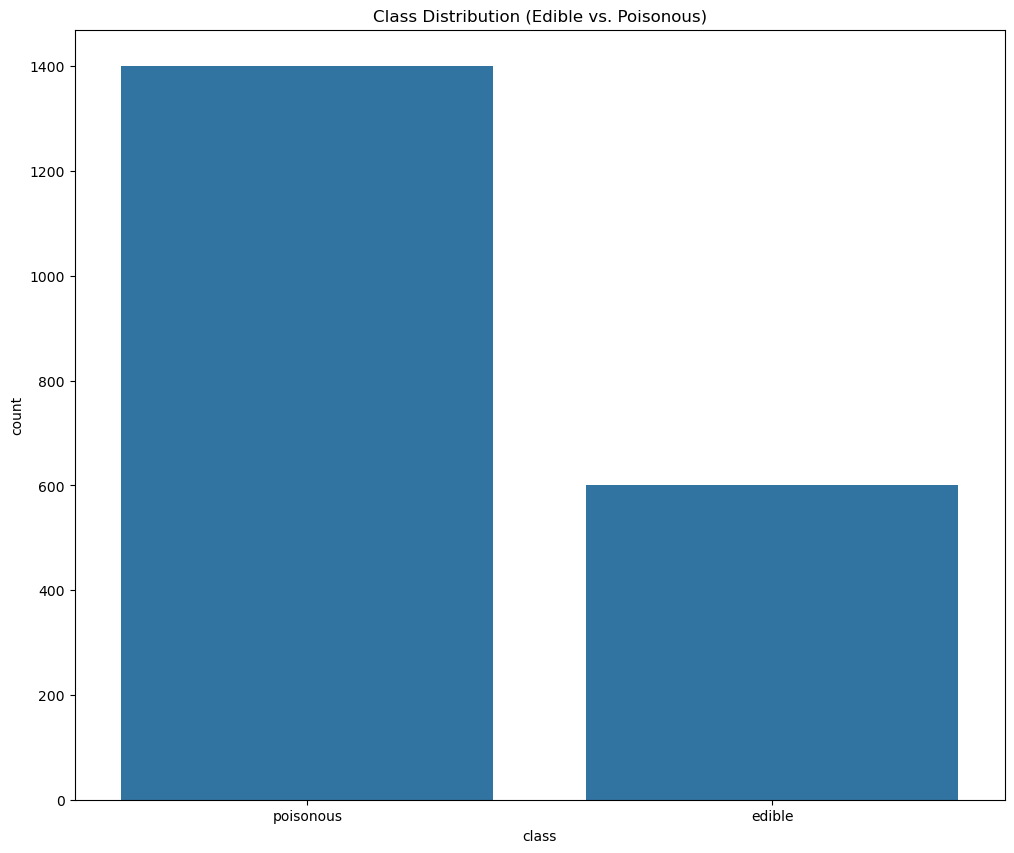

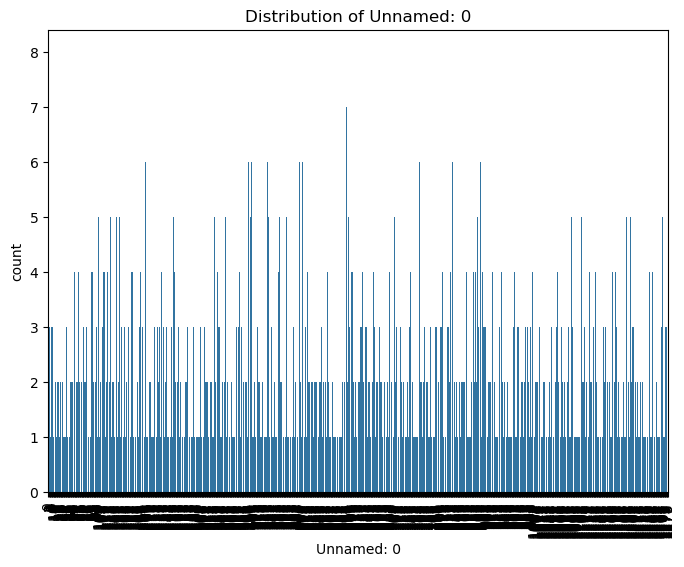

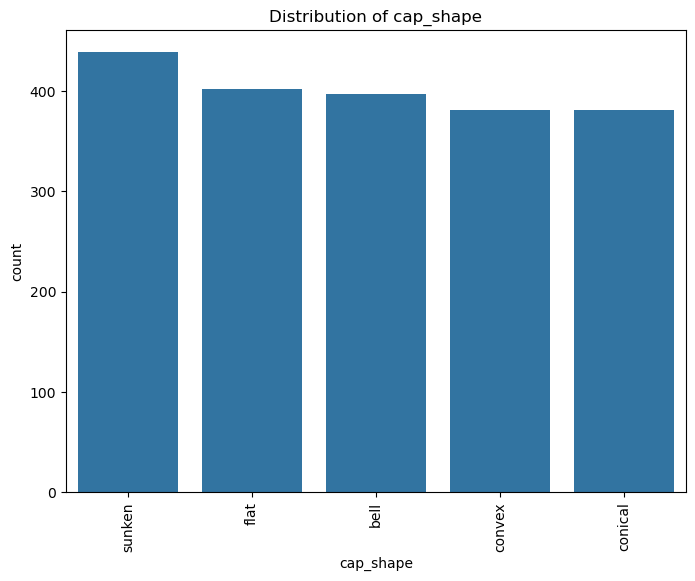

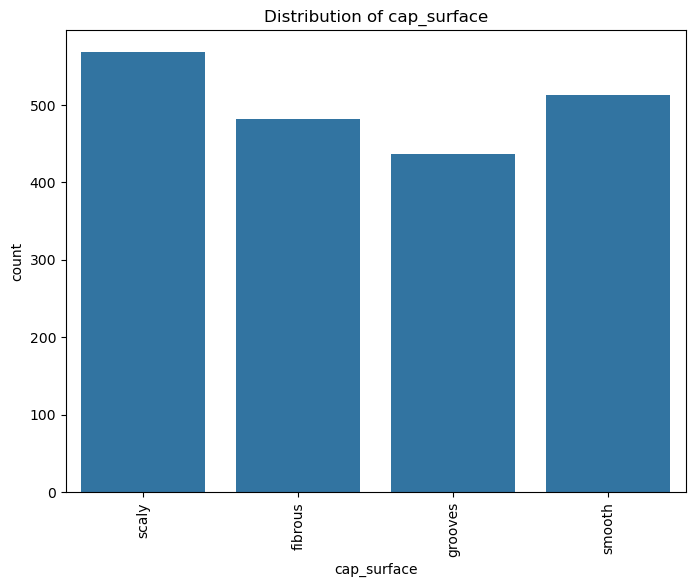

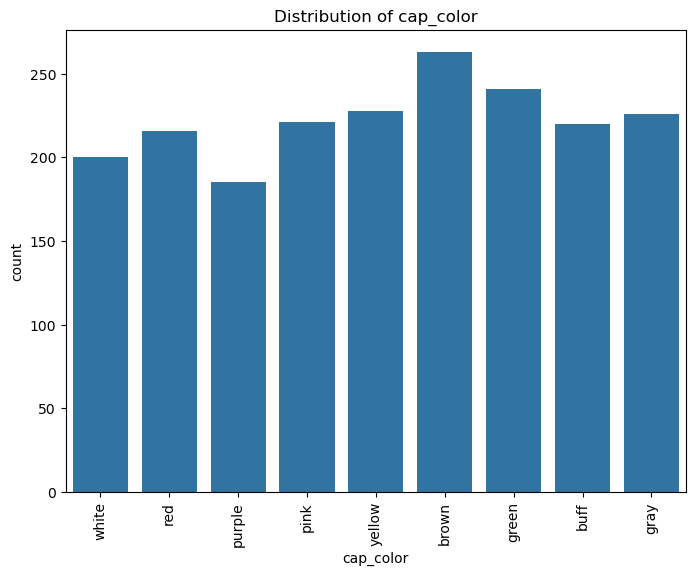

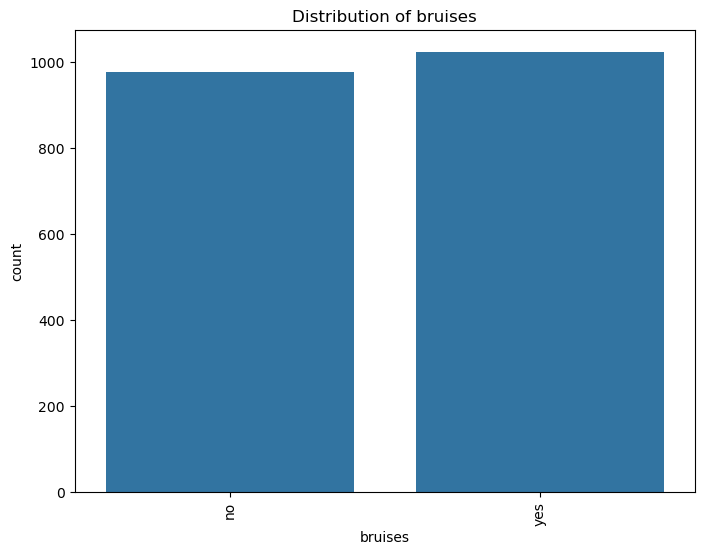

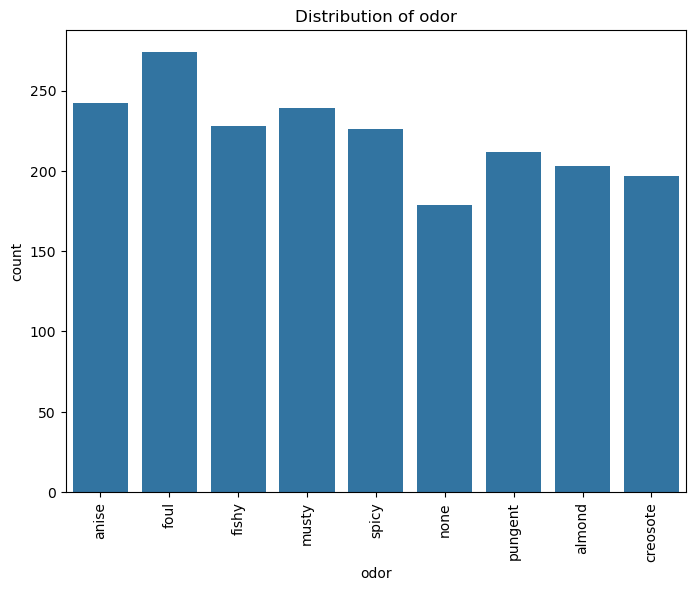

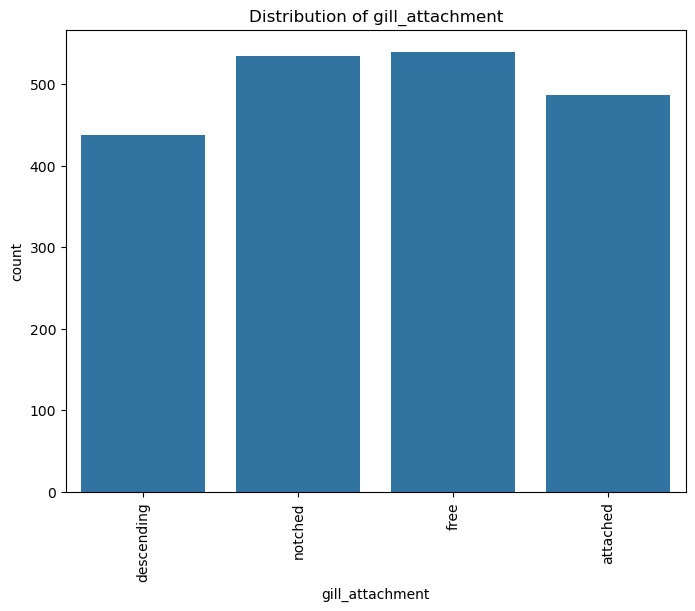

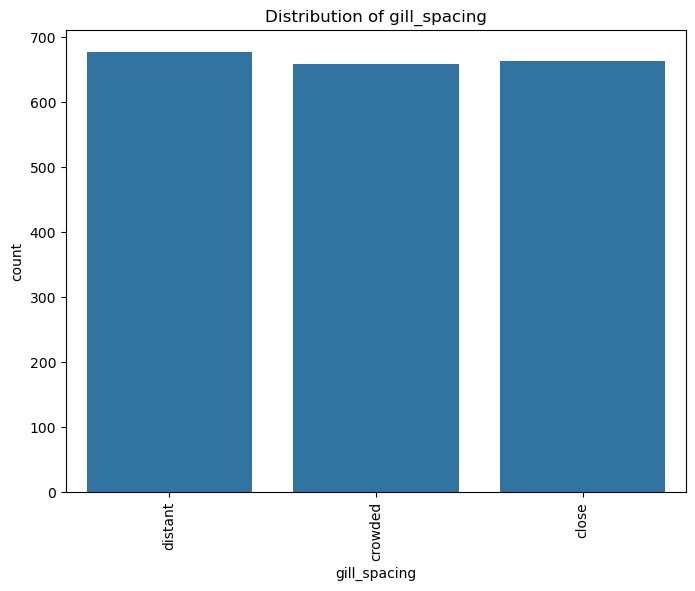

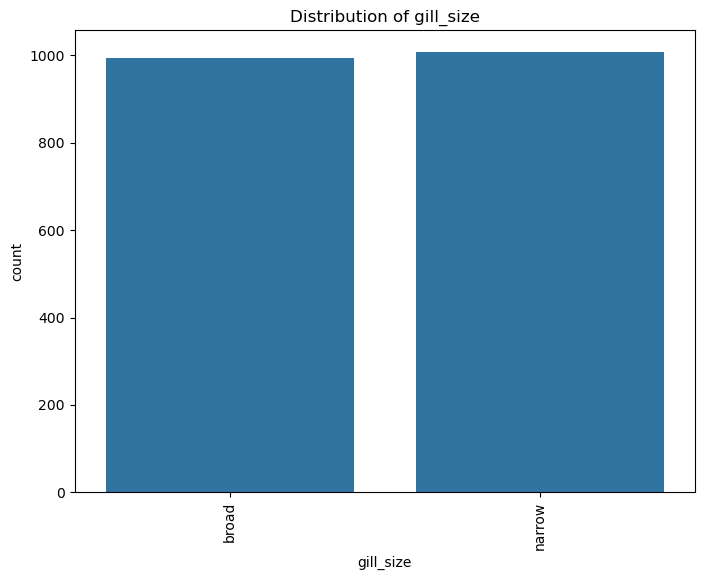

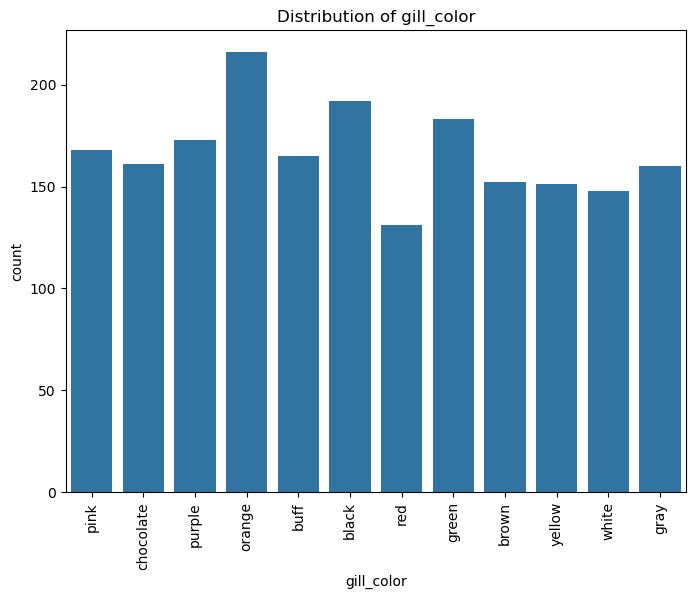

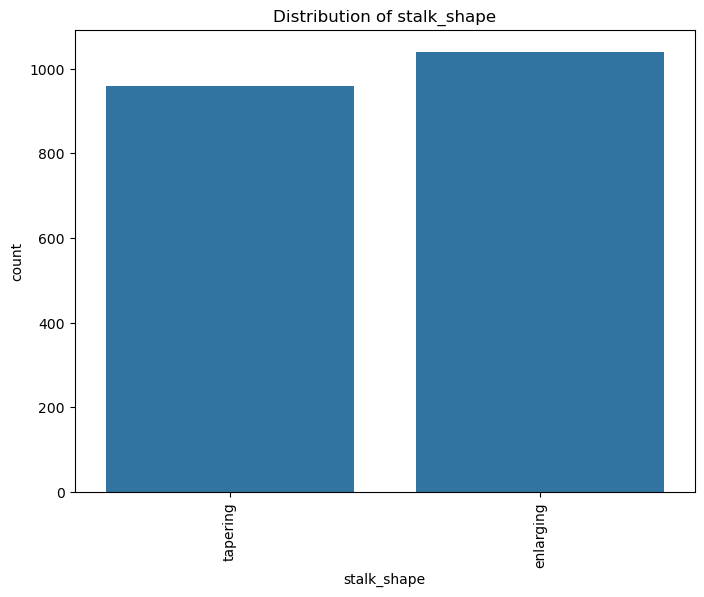

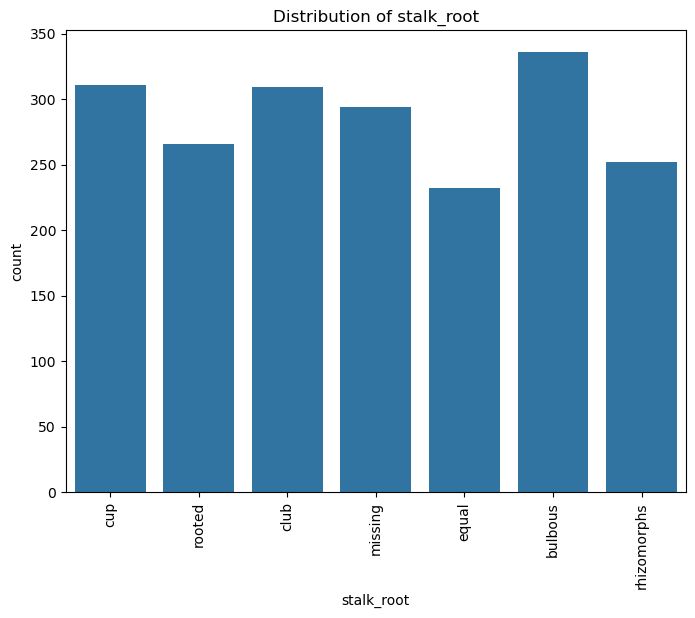

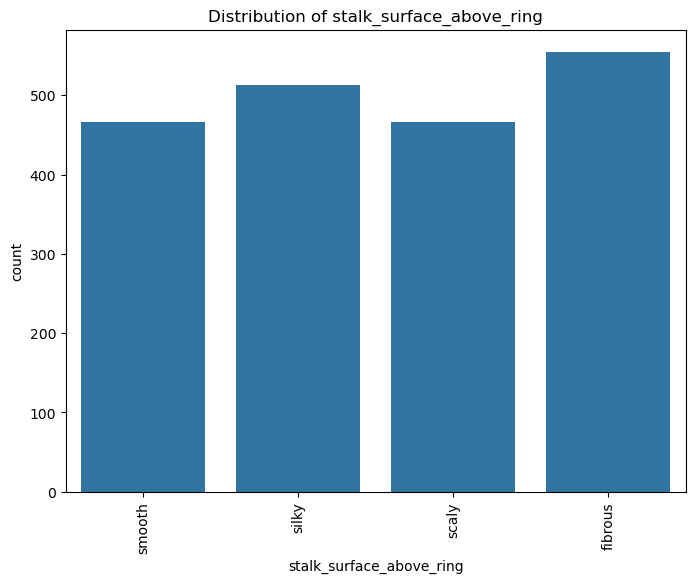

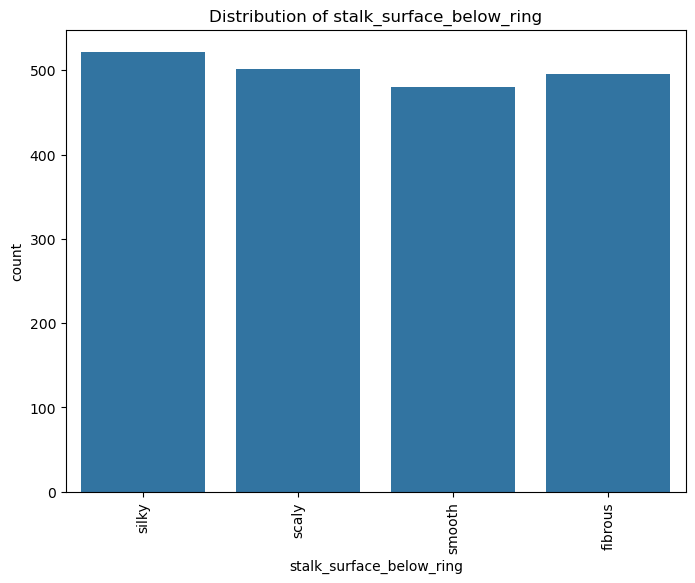

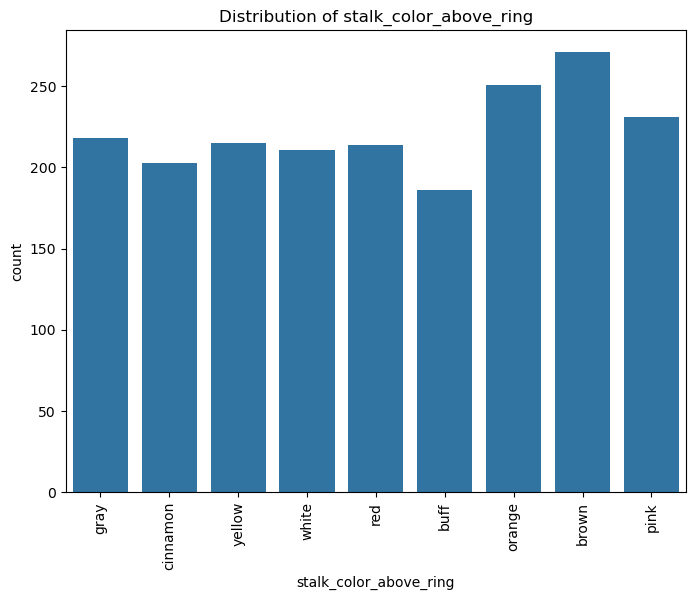

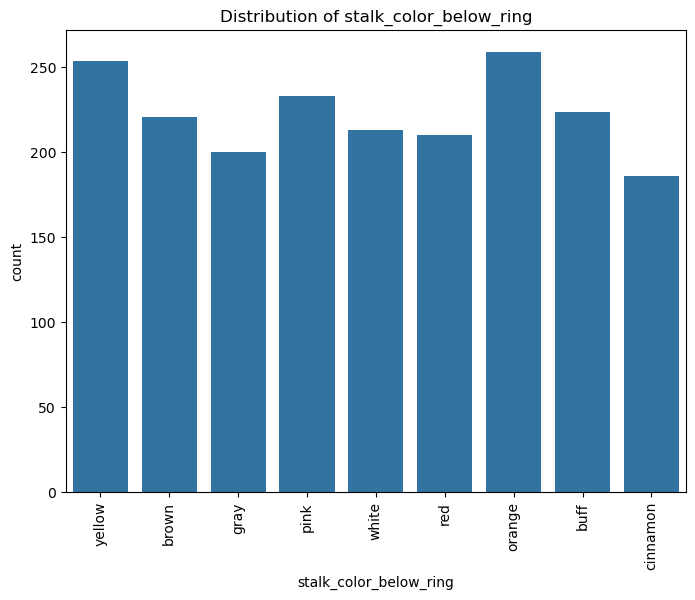

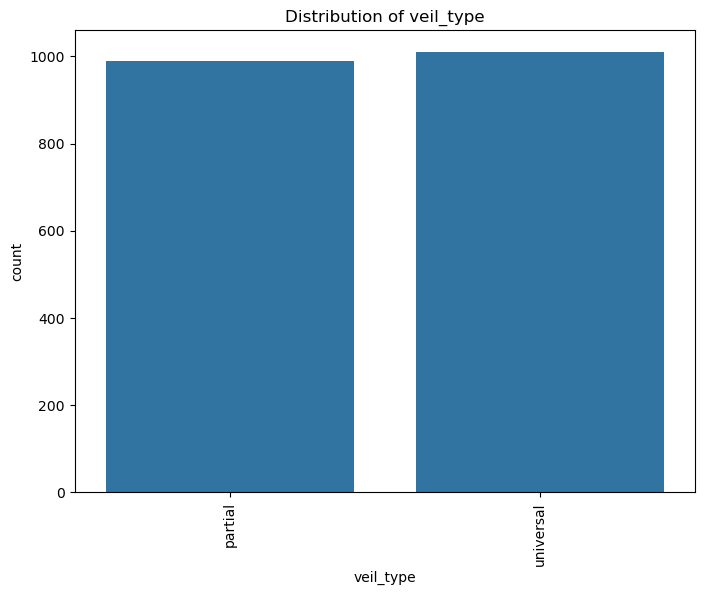

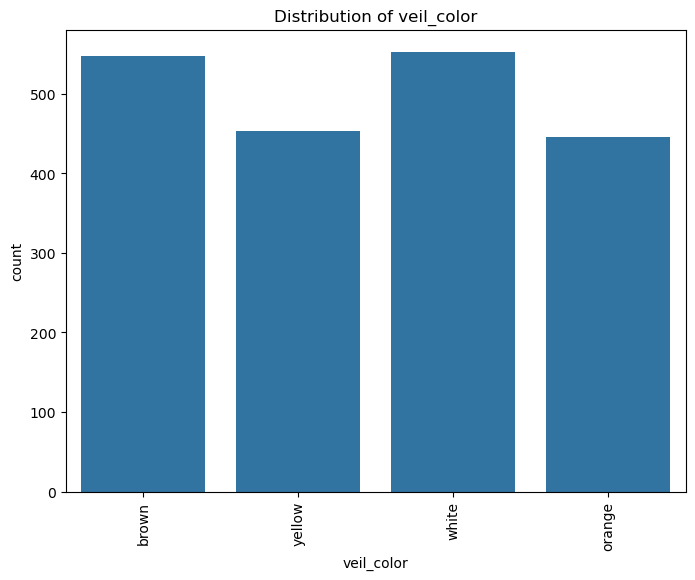

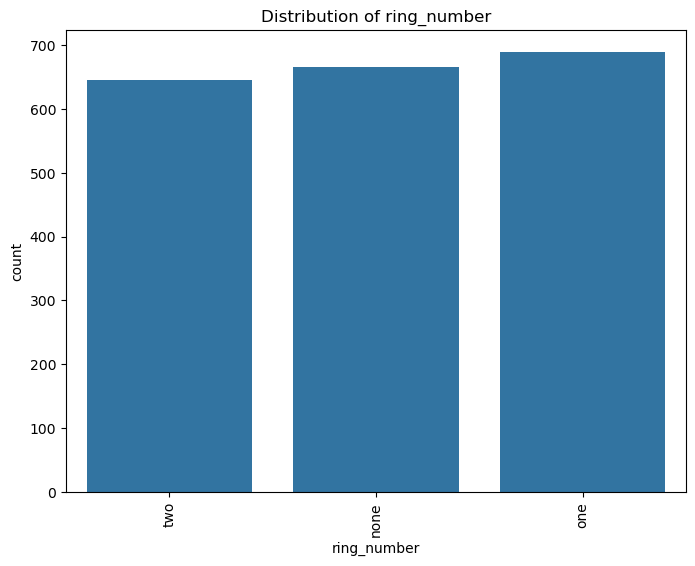

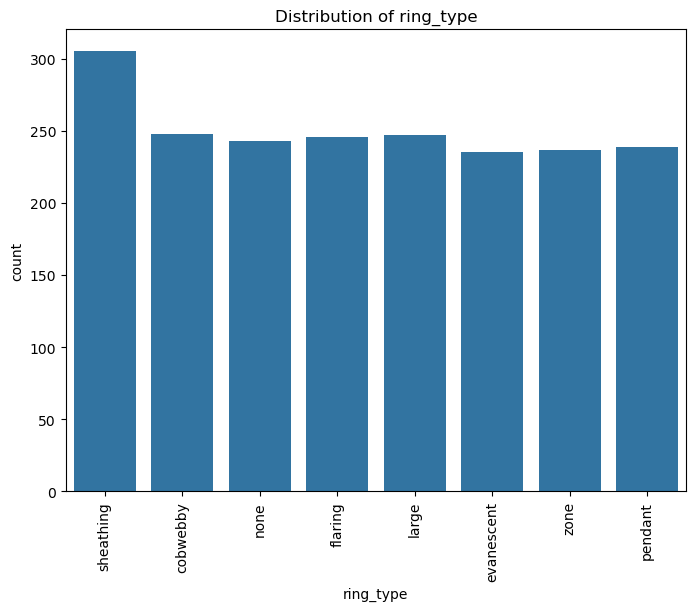

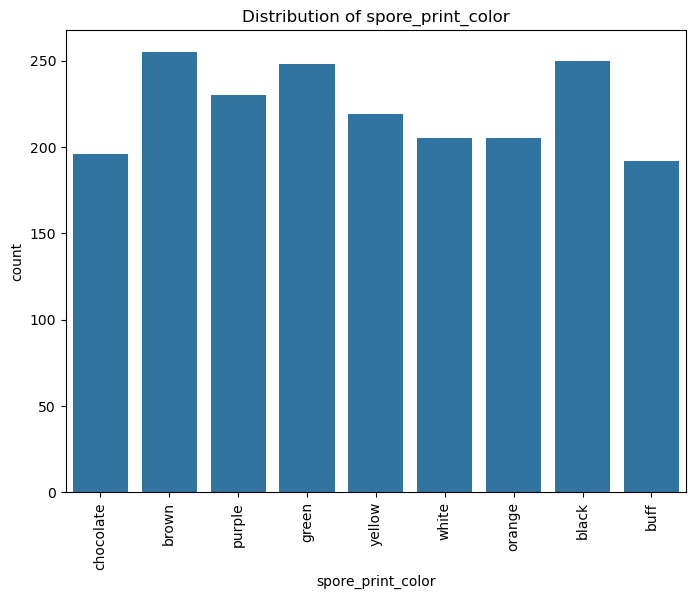

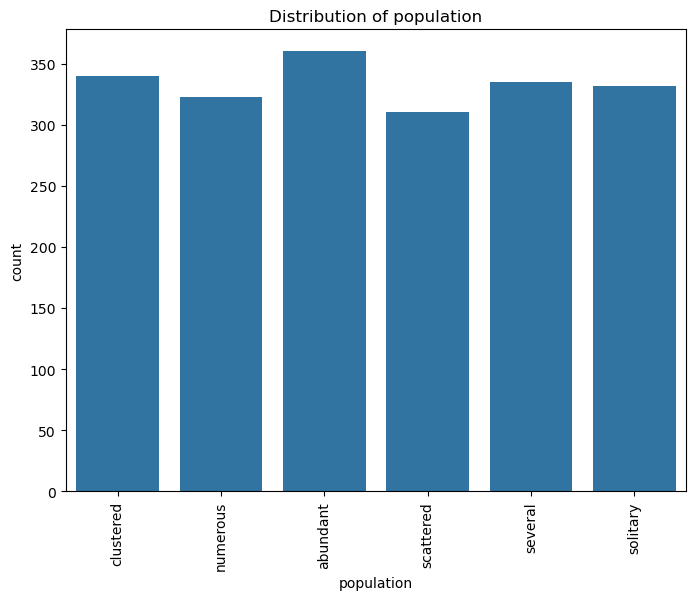

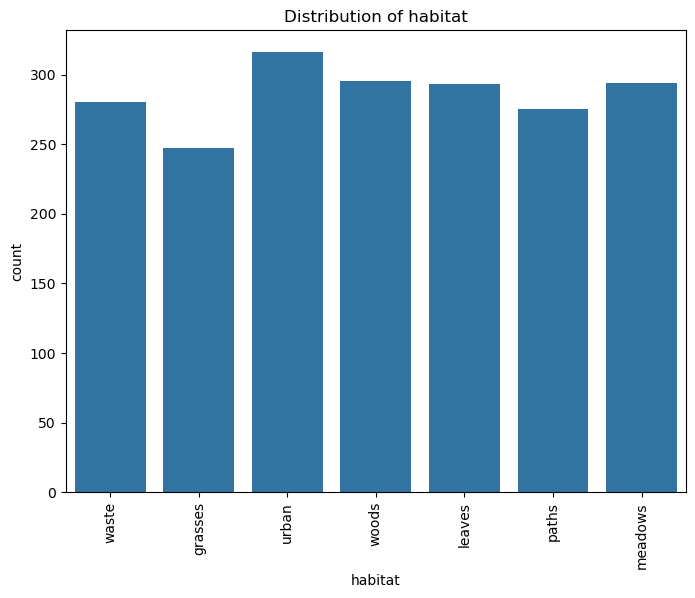

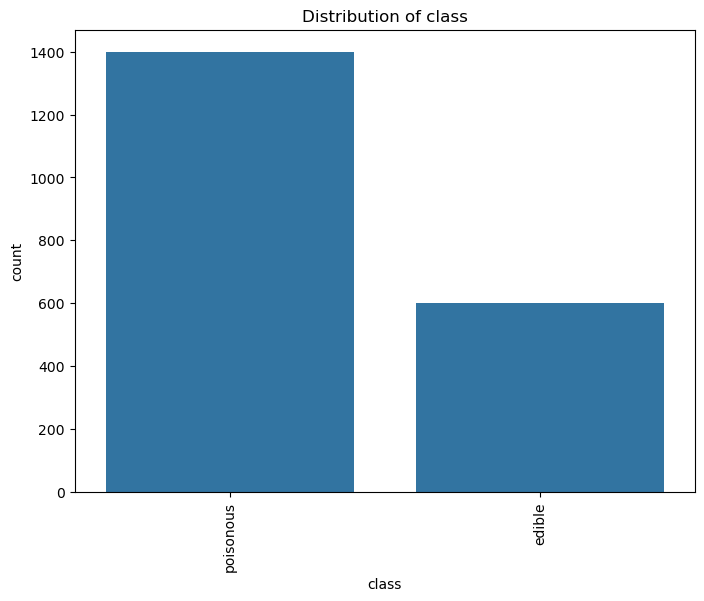

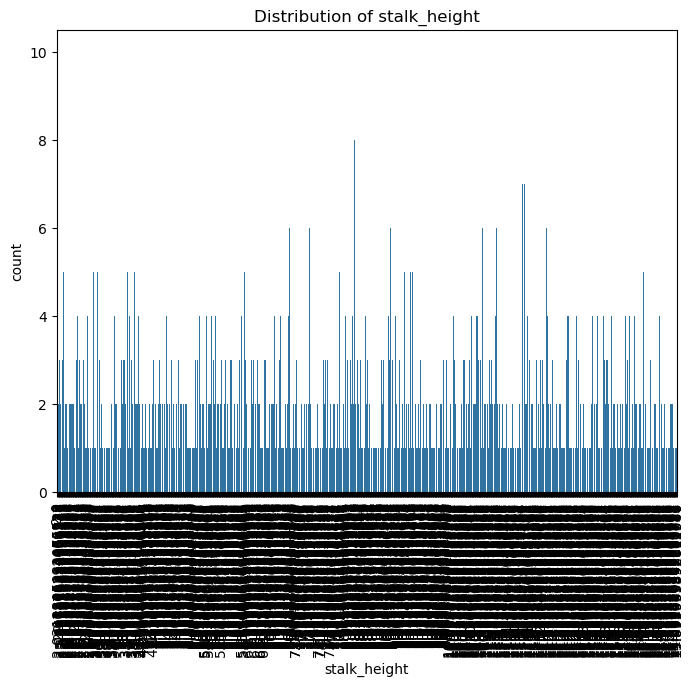

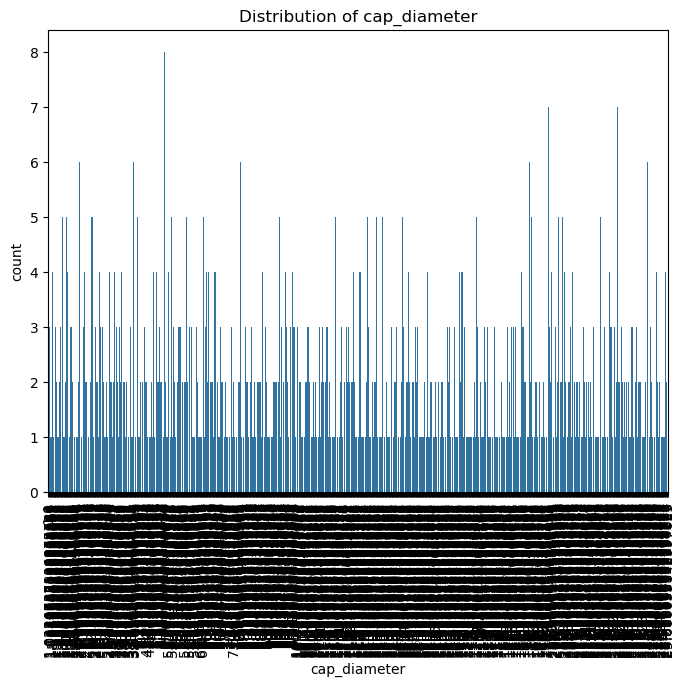

In [3]:
#Visualize Feature Distributions
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of each feature
plt.figure(figsize=(12, 10))
sns.countplot(data=df, x='class')  # Distribution of the target class (edible vs. poisonous)
plt.title('Class Distribution (Edible vs. Poisonous)')
plt.show()

# Visualize other features
for column in df.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=90)
    plt.show()


Unnamed: 0  0     1     2     3     4     5     8     9     10    11    ...  \
class                                                                   ...   
edible         0     2     0     0     0     3     3     0     0     0  ...   
poisonous      4     0     3     1     2     0     0     5     1     2  ...   

Unnamed: 0  1267  1268  1269  1272  1273  1275  1276  1277  1278  1279  
class                                                                   
edible         1     0     0     0     1     0     0     0     0     0  
poisonous      0     5     1     2     0     3     1     3     1     4  

[2 rows x 976 columns]
cap_shape  bell  conical  convex  flat  sunken
class                                         
edible      117      111     131   107     134
poisonous   280      270     250   295     305
cap_surface  fibrous  grooves  scaly  smooth
class                                       
edible           122      128    197     153
poisonous        360      309    371     360

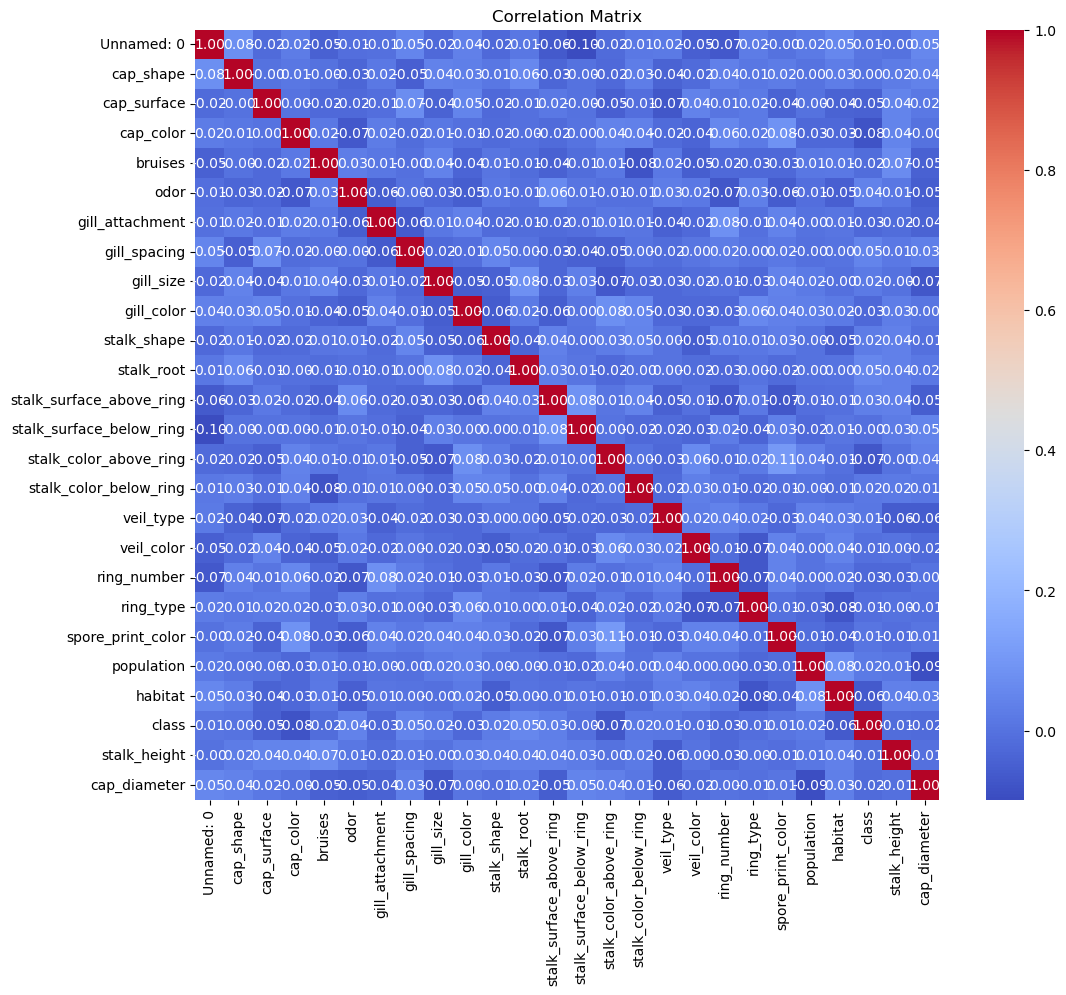

In [4]:
# Investigate correlations between features using crosstabs
for column in df.columns:
    if column != 'class':
        print(pd.crosstab(df['class'], df[column]))

# Alternatively, you can encode categorical features and visualize correlations
# We'll encode the features and then compute correlations
df_encoded = df.apply(lambda x: pd.Categorical(x).codes)

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [5]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# Encode the target column (class)
df['class'] = encoder.fit_transform(df['class'])

# Encode other features (since all features are categorical)
for column in df.columns:
    if column != 'class':
        df[column] = encoder.fit_transform(df[column])

print(df.head())


   Unnamed: 0  cap_shape  cap_surface  cap_color  bruises  odor  \
0         889          4            2          7        0     1   
1         786          4            0          6        0     1   
2         246          3            1          5        1     4   
3         221          0            2          4        1     3   
4         630          3            3          8        1     5   

   gill_attachment  gill_spacing  gill_size  gill_color  ...  veil_type  \
0                1             2          0           7  ...          0   
1                3             1          1           3  ...          1   
2                1             1          0           8  ...          1   
3                3             0          0           6  ...          0   
4                2             1          1           6  ...          1   

   veil_color  ring_number  ring_type  spore_print_color  population  habitat  \
0           0            2          6                  3         

In [6]:
#Split the Dataset into Training and Testing Sets
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop(columns='class')
y = df['class']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


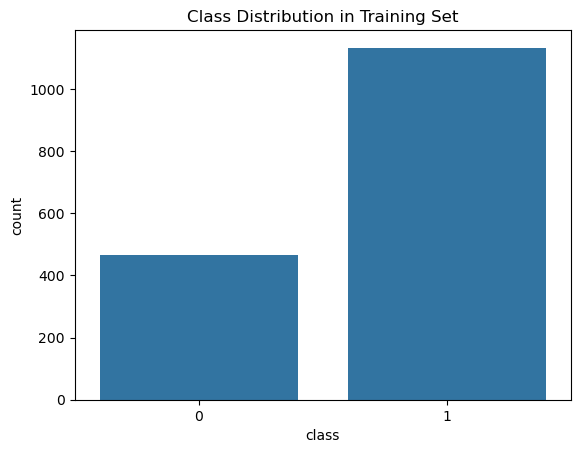

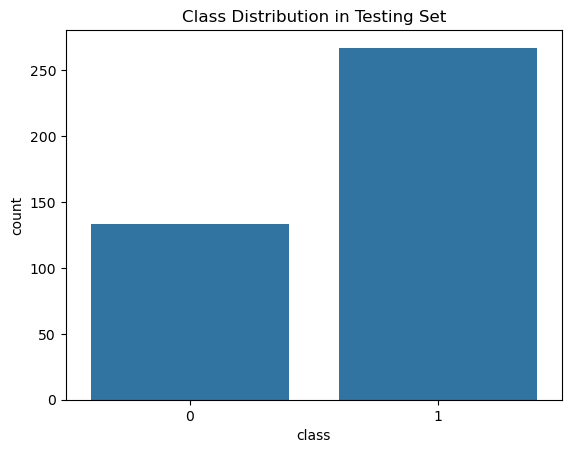

In [7]:
# Visualize the distribution of the target class in train and test sets
sns.countplot(x=y_train)
plt.title('Class Distribution in Training Set')
plt.show()

sns.countplot(x=y_test)
plt.title('Class Distribution in Testing Set')
plt.show()


In [8]:
# SVM implimentation
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize and train the SVM classifier
svm = SVC(kernel='linear', random_state=42)  # You can change the kernel (e.g., 'linear', 'poly', 'rbf')
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Accuracy: 0.6675
Precision: 0.6675
Recall: 1.0000
F1-Score: 0.8006


In [ ]:
#Visualize SVM implimentation
from sklearn.decomposition import PCA

# Reduce the features to 2D using PCA for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train SVM with linear kernel
svm.fit(X_train_pca, y_train)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='coolwarm', marker='o', edgecolors='k', s=50)
plt.title("SVM Decision Boundaries with PCA (2D)")
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters from grid search
print("Best Parameters: ", grid_search.best_params_)

# Evaluate the model on the test data with the best parameters
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test)

# Evaluate performance
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Optimized Accuracy: {accuracy_best:.4f}")


In [ ]:
# Test different kernels
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    svm_kernel = SVC(kernel=kernel)
    svm_kernel.fit(X_train, y_train)
    y_pred_kernel = svm_kernel.predict(X_test)
    
    accuracy_kernel = accuracy_score(y_test, y_pred_kernel)
    print(f"Kernel: {kernel} | Accuracy: {accuracy_kernel:.4f}")
